In [ ]:
from uxsim import *
import itertools

seed = None

W = World(
    name="",
    deltan=5,
    tmax=3600, #1 hour simulation
    print_mode=1, save_mode=0, show_mode=1,
    random_seed=seed,
    duo_update_time=600
)
random.seed(seed)

# network definition
"""
    N1  N2  N3  N4 
    |   |   |   |
W1--I1--I2--I3--I4-<E1
    |   |   |   |
    v   ^   v   ^
    S1  S2  S3  S4
"""

signal_time = 20
sf_1=1
sf_2=1

I1 = W.addNode("I1", 1, 0, signal=[signal_time*sf_1,signal_time*sf_2])
I2 = W.addNode("I2", 2, 0, signal=[signal_time*sf_1,signal_time*sf_2])
I3 = W.addNode("I3", 3, 0, signal=[signal_time*sf_1,signal_time*sf_2])
I4 = W.addNode("I4", 4, 0, signal=[signal_time*sf_1,signal_time*sf_2])
W1 = W.addNode("W1", 0, 0)
E1 = W.addNode("E1", 5, 0)
N1 = W.addNode("N1", 1, 1)
N2 = W.addNode("N2", 2, 1)
N3 = W.addNode("N3", 3, 1)
N4 = W.addNode("N4", 4, 1)
S1 = W.addNode("S1", 1, -1)
S2 = W.addNode("S2", 2, -1)
S3 = W.addNode("S3", 3, -1)
S4 = W.addNode("S4", 4, -1)

#E <-> W direction: signal group 0
for n1,n2 in [[W1, I1], [I1, I2], [I2, I3], [I3, I4], [I4, E1]]:
    W.addLink(n2.name+n1.name, n2, n1, length=500, free_flow_speed=50, jam_density=0.2, number_of_lanes=3, signal_group=0)
    
#N -> S direction: signal group 1
for n1,n2 in [[N1, I1], [I1, S1], [N3, I3], [I3, S3]]:
    W.addLink(n1.name+n2.name, n1, n2, length=500, free_flow_speed=30, jam_density=0.2, signal_group=1)

#S -> N direction: signal group 2
for n1,n2 in [[N2, I2], [I2, S2], [N4, I4], [I4, S4]]:
    W.addLink(n2.name+n1.name, n2, n1, length=500, free_flow_speed=30, jam_density=0.2, signal_group=1)
    

# random demand definition every 30 seconds
dt = 30
demand = 2 #average demand for the simulation time
demands = []
for t in range(0, 3600, dt):
    dem = random.uniform(0, demand)
    for n1, n2 in [[N1, S1], [S2, N2], [N3, S3], [S4, N4]]:
        W.adddemand(n1, n2, t, t+dt, dem*0.25)
        demands.append({"start":n1.name, "dest":n2.name, "times":{"start":t,"end":t+dt}, "demand":dem})
    for n1, n2 in [[E1, W1], [N1, W1], [S2, W1], [N3, W1],[S4, W1]]:
        W.adddemand(n1, n2, t, t+dt, dem*0.75)
        demands.append({"start":n1.name, "dest":n2.name, "times":{"start":t,"end":t+dt}, "demand":dem})

W.exec_simulation()
W.analyzer.print_simple_stats()

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


simulation setting:
 scenario name: 
 simulation duration:	 3600 s
 number of vehicles:	 14935 veh
 total road length:	 6500 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 720
 number of platoons:	 2987
 number of links:	 13
 number of nodes:	 14
 setup time:		 0.54 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      560 vehs|   4.9 m/s|     0.45 s
    1200 s|      575 vehs|   5.1 m/s|     1.21 s
    1800 s|      565 vehs|   4.4 m/s|     1.72 s
    2400 s|      580 vehs|   4.2 m/s|     2.09 s
    3000 s|      560 vehs|   4.9 m/s|     2.45 s
    3595 s|      585 vehs|   2.9 m/s|     2.77 s
 simulation finished
results:
 average speed:	 7.5 m/s
 number of completed trips:	 6885 / 14935
 average travel time of trips:	 1016.0 s
 average delay of trips:	 975.7 s
 delay ratio:			 0.960


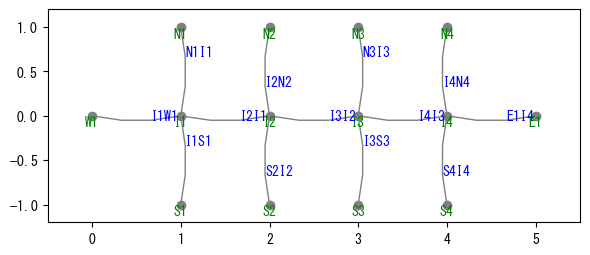

In [5]:
W.show_network()


In [ ]:
import pandas as pd
W.analyzer.vehicles_to_pandas().head(20)
df = W.analyzer.vehicles_to_pandas()
df.to_csv(r'\\wsl.localhost\Ubuntu\home\kalli\out.csv', index=False)
df.head(20)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 15-17: truncated \UXXXXXXXX escape (2467598119.py, line 4)

•	name: κωδικός του οχήματος (ή της ομάδας / διμοιρίας οχημάτων)
•	dn: το μέγεθος της ομάδας (διμοιρίας)
•	orig: αφετηρία οχήματος
•	dest: προορισμός οχήματος
•	t: χρόνος από την αρχή της εκτέλεσης της εξομοίωσης (σε δευτερόλεπτα)
•	link: τρέχουσα οδική ακμή που βρίσκεται το όχημα ή ο κωδικός κατάστασης
•	x: θέση εντός της οδικής ακμής από την αρχή της (σε μέτρα)
•	s: την απόσταση του οχήματος από το προπορευόμενο (σε μέτρα)
•	v: τρέχουσα ταχύτητα του οχήματος (χλμ/ώρα)